In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [15]:
dataset = xr.open_dataset("GMTED2010_15n015_00625deg.nc")
max_height = 2**15 - 1# int(dataset.elevation.mean() + 3*dataset.elevation.std())
data = np.array(dataset.elevation.values[::-1] - dataset.elevation.values.min()).astype(np.uint16)

In [11]:
dataset = xr.open_dataset("GEBCO_2024_sub_ice_topo.nc")
data = np.array(dataset.elevation.values.clip(min=0)[::-1,::1]).astype(np.float32)

: 

In [17]:
data *= int(2**16 / (data.max() + 1))
cv2.imwrite("heightmap.png", data.astype(np.uint16))

True

-412 7237


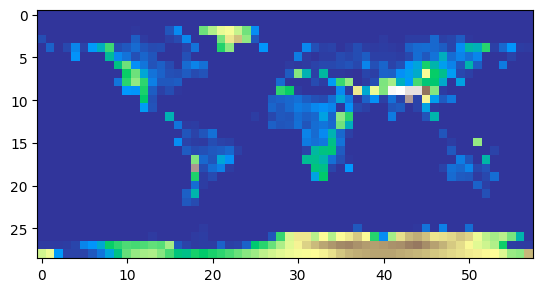

In [ ]:
print(data.min(), data.max())
plt.imshow(data, cmap="terrain")

# Make 8-bit
# heightmap = heightmap.clip(min=0, max=255).astype(np.uint8)
# heightmap = cv2.bilateralFilter(heightmap, d=13, sigmaColor=3000, sigmaSpace=1000, borderType=cv2.BORDER_DEFAULT)


: 